# Assignment 1

The following assignment is going to cover lectures 2, 3 & 4.

## Broad Topics are as follows:
- Rigid Body
- Differential Kinematics
- Geometric Perception

# Maximum Marks possible: [$60 = 20 + 20 + 20$]

If individual marks for a subpart is not specified assume equal marks for all the subparts within that section.

# How to Answer ?:

For theoretical questions make a markdown cell below each question/question-subpart and write the answer there.
For coding questions write the answer at the designated position indicated by the question.

# Submission:
You are have to submit the file `assignment_1.ipynb` with your answers into moodle.

# Section 1: Rigid Body [Full Marks: $20 = 10 + 10$]

## Question 1: [Marks: $10 = 4 + 6$]

Remember the Rodrigues formula for converting an axis of rotation into a rotation matrix: 

$$R = I + (1 - cos(\theta)) K^2 + sin(\theta) K \quad \text{- eqn(1)}$$

Where $K = \begin{bmatrix} 0 & -k_z & k_y \\ k_z & 0 & -k_x \\ -k_y & k_x & 0 \end{bmatrix}$

We briefly touched upon the fact that this formula gives us a speak into the world of Lie Groups and Lie Algebra's i.e. $R \in SO(3)$ and the $\theta K \in so(3)$

The following question has x parts:

### Question 1 Part 1: [Marks: $4$]

Write down the characteristic polynomial of the matrix $K$ in it's most simplified form. (Hint. Don't forget what K is)

### Question 1 Part 2: [Marks: $6$]

Now using the formula given in the eqn(1) find a single function $f$ such that $R = f(\theta K)$ (Hint. Cayley Hamilton Theorem, Taylor Series)

Note that $f$ should be in it's simplest form

## Question 2: [Marks: $10=3+4+3$]

There exists another fun way of expressing 3D rotations and is one widely used in real life computer vision and graphics applications.

They are called quaternions and it was created as an extension of the complex numer system.

It is an expression of the form $a + b \mathbf{i} + c \mathbf{j} + d \mathbf{k}$

They follow the following properties:

- A set of quaternions form a $4$-dimensional vector space.
- Each component of a quaternion follows a multiplication rule similar to vectors with some similarities to complex numbers as well.

### Multiplication Table:

$$\mathbf{i}^2 = \mathbf{j}^2 = \mathbf{k}^2 = -1$$
$$\mathbf{i} \mathbf{j} = -\mathbf{j} \mathbf{i} =  \mathbf{k}$$
$$\mathbf{j} \mathbf{k} = -\mathbf{k} \mathbf{j} =  \mathbf{i}$$
$$\mathbf{k} \mathbf{i} = -\mathbf{i} \mathbf{k} =  \mathbf{j}$$
$$\mathbf{i} \mathbf{j} \mathbf{k} = -1$$

We will learn more about quaternion with the coding assignment below:

In [5]:
import numpy as np

# A very basic quaternion class
class Quaternion:
    def __init__(self, w=0, x=0, y=0, z=0):
        self.w = w  # real/scalar part
        self.x = x  # i component
        self.y = y  # j component
        self.z = z  # k component

    def __add__(self, other):
        return Quaternion(self.w + other.w,
                          self.x + other.x,
                          self.y + other.y,
                          self.z + other.z)

    def __sub__(self, other):
        return Quaternion(self.w - other.w,
                          self.x - other.x,
                          self.y - other.y,
                          self.z - other.z)

    def __mul__(self, other):
        # Quaternion multiplication
        # ---COMPLETE-THE-REST OF THE CODE (Question 2 Part 1)---
        w = (self.w * other.w - self.x * other.x - self.y * other.y - self.z * other.z)
        x = (self.w * other.x + self.x * other.w + self.y * other.z - self.z * other.y)
        y = (self.w * other.y - self.x * other.z + self.y * other.w + self.z * other.x)
        z = (self.w * other.z + self.x * other.y - self.y * other.x + self.z * other.w)
        

        return Quaternion(w, x, y, z)

    def __str__(self):
        return f"{self.w:.2f} + {self.x:.2f}i + {self.y:.2f}j + {self.z:.2f}k"


def quaternion_to_rotation_matrix(q: Quaternion) -> np.ndarray:
    # ---COMPLETE-THE-REST OF THE CODE (Question 2 Part 2)---
    w, x, y, z = q.w, q.x, q.y, q.z

    R = np.array([
        [1 - 2 * (y**2 + z**2), 2 * (x * y - w * z), 2 * (x * z + w * y)],
        [2 * (x * y + w * z), 1 - 2 * (x**2 + z**2), 2 * (y * z - w * x)],
        [2 * (x * z - w * y), 2 * (y * z + w * x), 1 - 2 * (x**2 + y**2)]
    ])

    return R


def exp_map_so3(axis: np.ndarray, angle: float) -> np.ndarray:
    # ---COMPLETE-THE-REST OF THE CODE (Question 2 Part 3)---
    if np.abs(angle) < 1e-10:
        return np.eye(3)

    I = np.eye(3)

    def cross_product_matrix_function(m):
        return np.cross(I, m)
    K = cross_product_matrix_function(axis)
    R = I + (1 - np.cos(angle))*K@K + np.sin(angle)*K
    return R

### Question 2 Part 1 [Marks: $3$]

Based on the above definition of multiplication can you complete the multiplication function between two quaternions.
Write your answer in the `def __mul__(self, other):` function above.

### Question 2 Part 2 [Marks: $4$]

In our lectures we saw how to convert between different representations of rotation. The relationship between a quaternion and axis angle is as follows:

For an axis angle representation $k = ([k_x, k_y, k_z], \theta)$ and a quaternion $q = (w, x, y, z)$ where $k$ is a unit vector. 

$$ w = cos(\theta/2), \ x = k_x sin(\theta / 2), \ y = k_y sin(\theta/2), \ z = k_z sin(\theta/2)$$

Knowing what you know about the Rotation Matrix and axis angle representation, can you create a formula for directly convetring a quaternion $q$ into a rotation matrix.

First derive the result and then code up the solution in: `def quaternion_to_rotation_matrix(q: Quaternion)`

### Question 2 Part 3 [Marks: $3$]

Implement the exponential map that we derived in Question 1 in `def exp_map_so3(axis: np.ndarray, angle: float)`


### But why did we make all these functions:

These transformations not only help us with making intresting conversions but also helps us **interpolate between rotations**.

In [6]:
def normalize_quaternion(q: Quaternion) -> Quaternion:
    """Normalize a quaternion"""
    norm = np.sqrt(q.w**2 + q.x**2 + q.y**2 + q.z**2)
    return Quaternion(q.w/norm, q.x/norm, q.y/norm, q.z/norm)


def quaternion_interpolation(q1: Quaternion, q2: Quaternion, t: float) -> Quaternion:
    """Spherical Linear Interpolation between quaternions"""
    # Normalize quaternions
    q1 = normalize_quaternion(q1)
    q2 = normalize_quaternion(q2)

    # Compute the cosine of the angle between quaternions
    cos_theta = q1.w*q2.w + q1.x*q2.x + q1.y*q2.y + q1.z*q2.z

    # Ensure we take the shortest path
    if cos_theta < 0:
        q2 = Quaternion(-q2.w, -q2.x, -q2.y, -q2.z)
        cos_theta = -cos_theta

    # If quaternions are too close, perform linear interpolation
    if cos_theta > 0.9995:
        return normalize_quaternion(Quaternion(
            w=(1-t)*q1.w + t*q2.w,
            x=(1-t)*q1.x + t*q2.x,
            y=(1-t)*q1.y + t*q2.y,
            z=(1-t)*q1.z + t*q2.z
        ))

    # Interpolation on the surface of a hypersphere
    theta = np.arccos(cos_theta)
    sin_theta = np.sin(theta)

    s1 = np.sin((1-t)*theta) / sin_theta
    s2 = np.sin(t*theta) / sin_theta

    return normalize_quaternion(Quaternion(
        w=s1*q1.w + s2*q2.w,
        x=s1*q1.x + s2*q2.x,
        y=s1*q1.y + s2*q2.y,
        z=s1*q1.z + s2*q2.z
    ))


def rotation_interpolation(R1: np.ndarray, R2: np.ndarray, t: float) -> np.ndarray:
    """Linear interpolation between rotation matrices using axis-angle representation."""

    # Ensure valid rotation matrices
    if not (np.allclose(np.dot(R1, R1.T), np.eye(3)) and np.allclose(np.dot(R2, R2.T), np.eye(3))):
        raise ValueError("Input matrices must be valid rotation matrices")

    # Here we implement the logarithmic map with some additional conditions for stability
    # Convert matrices to axis-angle representation
    theta1 = np.arccos(np.clip((np.trace(R1) - 1)/2, -1.0, 1.0))
    theta2 = np.arccos(np.clip((np.trace(R2) - 1)/2, -1.0, 1.0))

    axis1 = np.array([
            R1[2,1] - R1[1,2],
            R1[0,2] - R1[2,0],
            R1[1,0] - R1[0,1]
        ]) / (2 * np.sin(theta1))
        
    axis2 = np.array([
        R2[2,1] - R2[1,2],
        R2[0,2] - R2[2,0],
        R2[1,0] - R2[0,1]
    ]) / (2 * np.sin(theta2))
    
    # Handle special cases
    if theta1 < 1e-10:  # R1 is identity
        if theta2 < 1e-10:  # Both are identity
            return np.eye(3)
        axis = axis2
        theta = t * theta2
    elif theta2 < 1e-10:  # R2 is identity
        axis = axis1
        theta = (1-t) * theta1
    else:
        # Normalize axes
        axis1 = axis1 / np.linalg.norm(axis1)
        axis2 = axis2 / np.linalg.norm(axis2)
        
        # Check if axes are opposite
        if np.dot(axis1, axis2) < 0:
            axis2 = -axis2
            theta2 = -theta2
            
        # Linear interpolation of axis and angle
        theta = (1-t)*theta1 + t*theta2
        axis = (1-t)*axis1 + t*axis2
        axis = axis / np.linalg.norm(axis)  # Ensure normalized axis
    # Convert axis-angle representation to rotation matrix
    return exp_map_so3(axis, theta)

**Visualization functions**

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline


def plot_rotation_axis(ax, axis, scale=1.0, label_offset=0.1):
    """Plot the rotation axis as a dashed line with label"""
    # Plot axis line
    axis_normalized = axis / np.linalg.norm(axis)
    axis_line = np.vstack([-scale * axis_normalized, scale * axis_normalized])
    ax.plot3D(axis_line[:, 0], axis_line[:, 1], axis_line[:, 2], 
              'k--', linewidth=2, label='Rotation Axis')
    
    # Add label with arrow
    label_pos = (scale + label_offset) * axis_normalized
    ax.text(label_pos[0], label_pos[1], label_pos[2], 
            'Rotation\nAxis', 
            fontsize=10, 
            horizontalalignment='center')


def create_coordinate_frame(scale=0.3):
    """Create a coordinate frame with RGB arrows"""
    vertices = []
    connections = []
    colors = []
    
    def create_arrow_vertices(direction, color):
        base = np.zeros(3)
        tip = direction * scale
        
        # Arrow head parameters
        head_length = scale * 0.2
        head_width = scale * 0.1
        
        # Calculate arrow head vertices
        if direction[0] == 1:  # X-axis
            head1 = tip - [head_length, head_width, 0]
            head2 = tip - [head_length, -head_width, 0]
            head3 = tip - [head_length, 0, head_width]
            head4 = tip - [head_length, 0, -head_width]
            label_pos = tip + [0.05, 0, 0]
            label = "X"
        elif direction[1] == 1:  # Y-axis
            head1 = tip - [head_width, head_length, 0]
            head2 = tip - [-head_width, head_length, 0]
            head3 = tip - [0, head_length, head_width]
            head4 = tip - [0, head_length, -head_width]
            label_pos = tip + [0, 0.05, 0]
            label = "Y"
        else:  # Z-axis
            head1 = tip - [head_width, 0, head_length]
            head2 = tip - [-head_width, 0, head_length]
            head3 = tip - [0, head_width, head_length]
            head4 = tip - [0, -head_width, head_length]
            label_pos = tip + [0, 0, 0.05]
            label = "Z"
        
        start_idx = len(vertices)
        vertices.extend([base, tip, head1, head2, head3, head4, label_pos])
        
        # Add connections
        connections.extend([
            (start_idx, start_idx + 1),  # Main arrow line
            (start_idx + 1, start_idx + 2),  # Head lines
            (start_idx + 1, start_idx + 3),
            (start_idx + 1, start_idx + 4),
            (start_idx + 1, start_idx + 5)
        ])
        
        colors.extend([color] * 5)  # One color for each connection
        return label, label_pos
    
    # Create arrows and store label information
    labels = []
    label_positions = []
    
    x_label, x_pos = create_arrow_vertices(np.array([1, 0, 0]), 'r')  # X-axis (red)
    y_label, y_pos = create_arrow_vertices(np.array([0, 1, 0]), 'g')  # Y-axis (green)
    z_label, z_pos = create_arrow_vertices(np.array([0, 0, 1]), 'b')  # Z-axis (blue)
    
    labels.extend([x_label, y_label, z_label])
    label_positions.extend([x_pos, y_pos, z_pos])
    
    return np.array(vertices), connections, colors, labels, np.array(label_positions)


def plot_coordinate_frame(ax, R, vertices, connections, colors, labels, label_positions):
    """Plot the coordinate frame after applying rotation R"""
    # Apply rotation to vertices
    rotated_vertices = (R @ vertices.T).T
    rotated_labels_pos = (R @ label_positions.T).T
    
    # Plot each connection with its color
    for (start, end), color in zip(connections, colors):
        ax.plot3D(rotated_vertices[[start, end], 0],
                 rotated_vertices[[start, end], 1],
                 rotated_vertices[[start, end], 2],
                 color=color, linewidth=2)
    
    # Add labels for axes
    for label, pos in zip(labels, rotated_labels_pos):
        ax.text(pos[0], pos[1], pos[2], label, fontsize=10)


def plot_rotation_axis(ax, axis, scale=1.0, label_offset=0.1):
    """Plot the rotation axis as a dashed line with label"""
    # Plot axis line
    axis_normalized = axis / np.linalg.norm(axis)
    axis_line = np.vstack([-scale * axis_normalized, scale * axis_normalized])
    ax.plot3D(axis_line[:, 0], axis_line[:, 1], axis_line[:, 2], 
              'k--', linewidth=2, label='Rotation Axis')
    
    # Add label with arrow
    label_pos = (scale + label_offset) * axis_normalized
    ax.text(label_pos[0], label_pos[1], label_pos[2], 
            'Rotation\nAxis', 
            fontsize=10, 
            horizontalalignment='center')


def visualize_rotation_interpolation(rotation_axis=np.array([1, 1, 1]),
                                     rotation_angle=np.pi/1.5):
    # Create initial and final rotations
    q1 = Quaternion(1, 0, 0, 0)  # Identity quaternion
    # Axis angle to quaternion transformation
    angle = rotation_angle
    axis = rotation_axis
    axis = axis / np.linalg.norm(axis)
    q2 = Quaternion(np.cos(angle/2),
                    axis[0]*np.sin(angle/2),
                    axis[1]*np.sin(angle/2),
                    axis[2]*np.sin(angle/2))
    q1 = normalize_quaternion(q1)
    q2 = normalize_quaternion(q2)

    # Create initial and final rotation matrices
    R1 = quaternion_to_rotation_matrix(q1)
    R2 = quaternion_to_rotation_matrix(q2)

    # Create coordinate frame
    vertices, connections, colors, labels, label_positions = create_coordinate_frame()

    # Create interpolation points
    t_values = np.linspace(0, 1, 50)

    # Create figure once
    plt.close('all')  # Clean up any existing plots
    fig = plt.figure(figsize=(15, 7))
    
    # Add text annotation for rotation angle
    angle_deg = np.degrees(angle)
    angle_text = f'Rotation Angle: {angle_deg:.1f}°'

    # Animation loop
    for i, t in enumerate(t_values):
        # Clear the current figure but keep the window
        plt.clf()
        
        # Create new subplots
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')

        # Quaternion interpolation
        q_interp = quaternion_interpolation(q1, q2, t)
        R_q = quaternion_to_rotation_matrix(q_interp)

        # Matrix interpolation
        R_m = rotation_interpolation(R1, R2, t)

        # Plot coordinate frames
        plot_coordinate_frame(ax1, R_q, vertices, connections, colors, labels, label_positions)
        plot_coordinate_frame(ax2, R_m, vertices, connections, colors, labels, label_positions)

        # Set plot properties
        for ax, title in [(ax1, 'Quaternion Interpolation'),
                         (ax2, 'Matrix Interpolation')]:
            # Plot rotation axis
            plot_rotation_axis(ax, axis)
            
            # Add rotation angle text
            ax.text2D(0.05, 0.95, angle_text,
                     transform=ax.transAxes,
                     fontsize=10,
                     bbox=dict(facecolor='white', alpha=0.8))
            
            ax.set_title(title)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_zlim([-1, 1])
            ax.set_box_aspect([1,1,1])
            
            # Add legend
            ax.legend(loc='upper right')
            
            # Set view angle
            ax.view_init(elev=30, azim=45)

        plt.tight_layout()
        
        # Only display during animation, show() at the end
        if i < len(t_values) - 1:
            clear_output(wait=True)
            display(fig)
            time.sleep(0.05)
        else:
            # For the final frame, use plt.show()
            plt.show()

## Play with code:

Change the `rotation_axis` and `rotation_angle` to view the 3D arrow coordinate rotating around it.

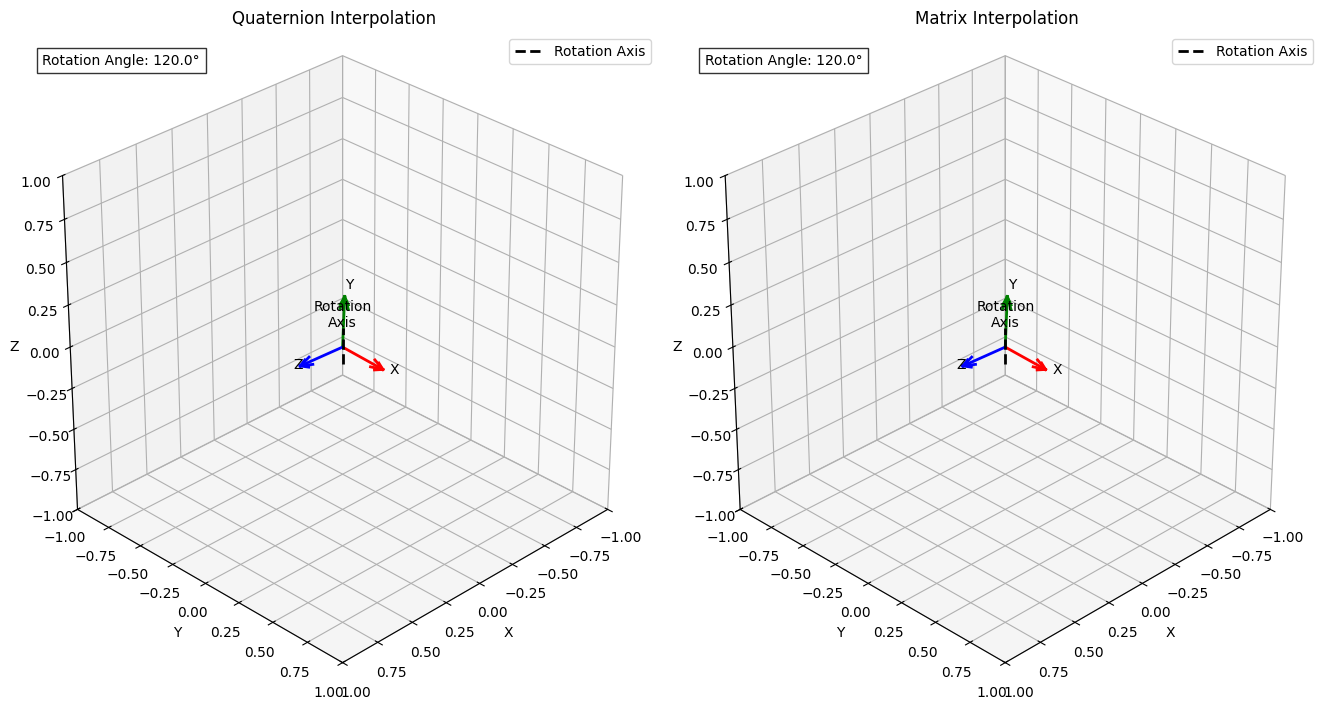

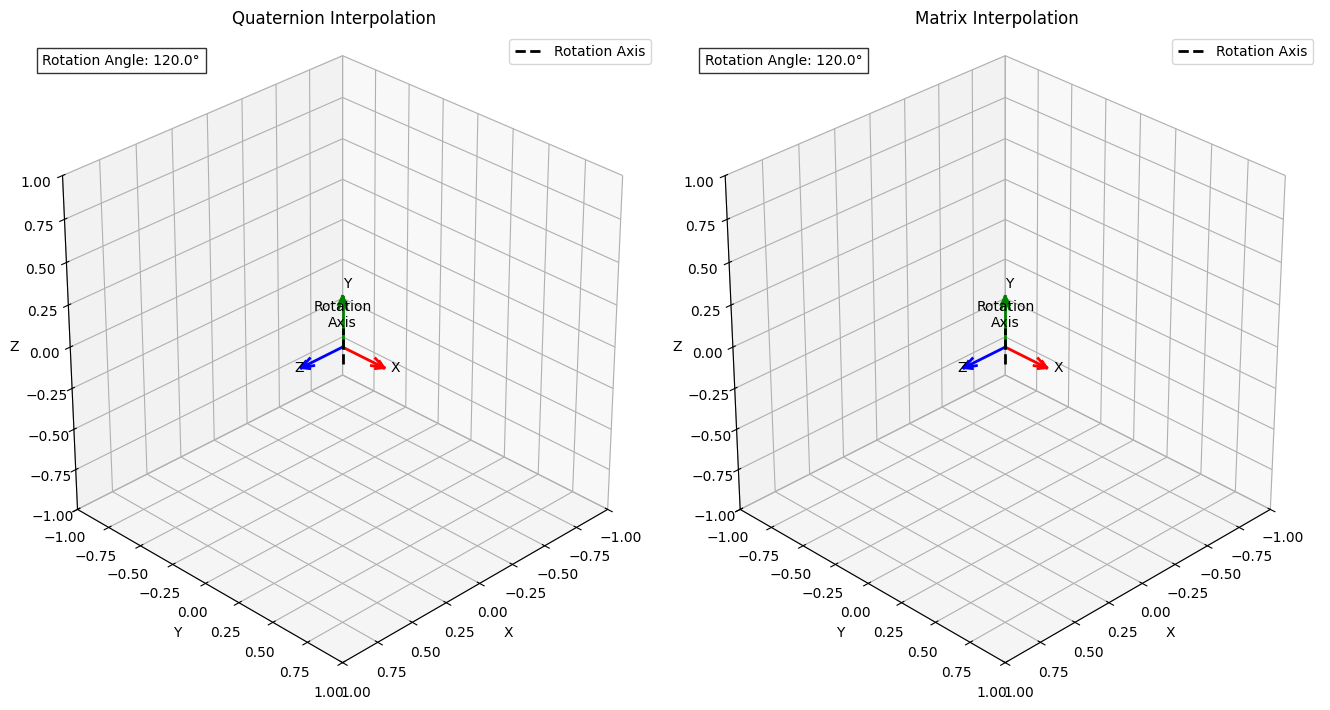

In [8]:
visualize_rotation_interpolation(rotation_axis=np.array([1, 1, 1]), rotation_angle = np.pi/1.5)

# Section 2: Differential Kinematics [Full Marks: $20 = 10 + 10$]

## Question 1: Inverse Kinematics [Marks: $10$]

An animation of a typical box grasping IK can be shown below:

<img src="../data/ik.gif" alt="Drawing" style="width: 400px;"/>

You can use the library **robotic** to achieve a simple ik, more can be found at https://github.com/MarcToussaint/robotic/

In [ ]:
import robotic as ry
import numpy as np
import time

C = ry.Config()
C.addFile(ry.raiPath('scenarios/pandaSingle.g'))
C.view()

C.addFrame('box') \
    .setPosition([-.25,.1,1.]) \
    .setShape(ry.ST.ssBox, size=[.06,.06,.06,.005]) \
    .setColor([1,.5,0]) \
    .setContact(1)
C.view()

qHome = C.getJointState()

komo = ry.KOMO(C, 1,1,0, True)
komo.addObjective([], ry.FS.jointState, [], ry.OT.sos, [1e-1], qHome)
komo.addObjective([], ry.FS.accumulatedCollisions, [], ry.OT.eq)
komo.addObjective([], ry.FS.jointLimits, [], ry.OT.ineq)
komo.addObjective([], ry.FS.positionDiff, ['l_gripper', 'box'], ry.OT.eq, [1e1])
komo.addObjective([], ry.FS.scalarProductXX, ['l_gripper', 'box'], ry.OT.eq, [1e1], [0])
komo.addObjective([], ry.FS.scalarProductXZ, ['l_gripper', 'box'], ry.OT.eq, [1e1], [0])
komo.addObjective([], ry.FS.distance, ['l_palm', 'box'], ry.OT.ineq, [1e1])

ret = ry.NLP_Solver(komo.nlp(), verbose=0 ) .solve()
print(ret)
if ret.feasible:
    print('-- Always check feasibility flag of NLP solver return')
else:
    print('-- THIS IS INFEASIBLE!')

q = komo.getPath()
C.setJointState(q[0])
C.view(False, "IK solution") # if you can not run this function, just comment this line
gripper_pos = C.getFrame('l_gripper').getPosition()
box = C.getFrame('box')
p0 = box.getPosition() # memory the start box position
print("pos diff", gripper_pos-p0)

for t in range(10):
    box.setPosition(p0 + .2 * np.random.randn(3)) # randomize box position
    komo.updateRootObjects(C) # only works for root objects (the 'box' is one)
    ret = ry.NLP_Solver(komo.nlp(), verbose=0 ) .solve()
    print(ret)
    q = komo.getPath()
    C.setJointState(q[0])
    gripper_pos = C.getFrame('l_gripper').getPosition()
    box_pos = C.getFrame('box').getPosition()
    print("pos diff ", gripper_pos-box_pos)
    C.view(False, 'IK solution - ' + ('*** INFEASIBLE ***' if not ret.feasible else 'feasible'))
    time.sleep(1.)

In the script, the key to achieve IK is to set clever constraints. Here, we focus on one constraint specifically, `scalarProduct`. The two lines of `scalarProductXX` and `scalarProductXZ` state that the gripper x-axis (which is the axis connecting the fingers) should be orthogonal to the object x- and z-axes.

Now, we also need to evaluate the other two cases: `the gripper x-axis is orthogonal to the object x- and y-axes`, and `the gripper x-axis is orthogonal to the object y- and z-axes` for **each randomized position**. For each case, we should keep track of the performance `100.*(ret.eq+ret.ineq) + ret.sos` and select the best IK pose with the leaset score. (**HINT: you may need a list to store the komo instances with three different gripper constraints**).

Please complete the code in the following block:

In [ ]:
###########TODO############
del komo
komo = []



###########################

## Question 2: Bimanual Manipulation [Marks: $10$]

Given that we have two robots and they are required to carry an object at the same time. 

<img src="../data/mobile_minis.gif" alt="Drawing" style="width: 400px;"/>

We want to keep a **fixed relative position** of the two end effectors **in the world frame**. Given that we have the kinematic tree of the multi-robot system, the function to return the positions of the end effectors $r0\_gripper\_pos(q), r1\_gripper\_pos(q)$, and the size of the object $[w, l ,h]$.

### Question 2 Part 1: 
How do we formulate the constraint function?

### Question 2 Part 2: 

Given that the DoF for each robot is 8, so the **joint configuration** $q \in R^{16}$. 
What is the size of the Jacobian matrix of the constraint function wrt $q$?


### Question 2 Part 3:

Given that we have the Jacobian matrix that maps the **joint configuration** $q$ to the position of one end effector $r0\_gripper\_pos(q)$.
If there is a zero submatrix within the Jacobian matrix, where is the zero submatrix?



### Question 2 Part 4:
To decompose the motion planning problem of the multi-robot systems into smaller problems. We randomly sample a configuration $q$.

<img src="../data/rrt_random.png" alt="Drawing" style="width: 400px;"/>

But since we randomly sample the configuration, there is no guarantee the end effectors will satisfy the constraints. 

Can you write the pseudocode to generate a configuration $q*$ to satisfy the constraints?

# Section 3: Geometric Perception [Full Marks: $20 = 10 + 10$]

## Question 1: Methods for Calculating Gradients: Manual vs. Autograd [Marks: $10$]
### Using Pytorch autograd feature to minimize errors

* torch.autograd is PyTorch's automatic differentiation engine that powers neural network training, but we can use it for other optimization purposes. We adapt it here to solve our perspective transformation fitting problem at hand.

> https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

> https://pytorch.org/tutorials/beginner/pytorch_with_examples.html?highlight=autograd

* Generally speaking, torch.autograd is an engine for computing **vector-Jacobian product**! Study the materials at the above links for more indepth understanding, if you so desire.

* Here is a link to Prof. Grosse's lecture on autodiff/autograd, which provides more technical information about how autograd works.

> https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec10.pdf


Some important observations:

* "Conceptually, autograd keeps a record of data (tensors) & all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, and roots are the output tensors. By tracing this graph from roots to leaves, you can **automatically compute the gradients using the chain rule.**"


* "**DAGs are dynamic in PyTorch** An important thing to note is that the graph is recreated from scratch; after each .backward() call, autograd starts populating a new graph. This is exactly what allows you to use control flow statements in your model; you can change the shape, size and operations at every iteration if needed."

* "torch.autograd tracks operations on all tensors which have their requires_grad flag set to True. For tensors that don't require gradients, setting this attribute to False excludes it from the gradient computation DAG."

* "The output tensor of an operation will require gradients even if only a single input tensor has requires_grad=True."

* "It is useful to "freeze" part of your model if you know in advance that you won't need the gradients of those parameters (this offers some performance benefits by reducing autograd computations)."


### Autograd is especially useful when you have chained functions.

\begin{equation}
z = f(x, a) \\
y = g(z, b)
\end{equation}

where $a$ and $b$ are parameters. We are interested in the derivatives of $y$ with respect to $a$ and $b$: $\frac{\partial y}{\partial a}$ and $\frac {\partial y}{\partial b}$

We you were do this the old fashion way, you will have to derive expressions for these derivatives and then code them.

$\frac {\partial y}{\partial b}  = \frac {\partial g(z, b)}{\partial b}$

$\frac {\partial y}{\partial a}  = \frac {\partial y}{\partial z} \frac {\partial z}{\partial a} = \frac {\partial g(z, b)}{\partial z} \frac {\partial f(x, a)}{\partial a}$

Note the use of chain rule for the second one.


Consider the case when $f(x, a) = ax^2$ and $g(z, b) = b/z$

$\frac {\partial y}{\partial b}  = 1/z$

$\frac {\partial y}{\partial a}  = \frac {\partial y}{\partial z} \frac {\partial z}{\partial a} = \frac {\partial g(z, b)}{\partial z} \frac {\partial f(x, a)}{\partial a} = -(b/z^2)x^2$

Let us say we have to compute these derivatives at $x=2, a = 3, b = 4$. 

**Let's implement both methods: manually and using autograd.**


**Manual**

In [9]:
def f (x, a) :
    ############ TODO ##############
    return a*(x**2)
    ################################

def g (z, b):
    ############ TODO ##############
    return b/z
    ################################

def z_deriv_a (x, a) :
    ############ TODO ##############
    return x**2
    ################################

def y_deriv_z (z, b) :
    ############ TODO ##############
    return -b/(z**2)
    ################################
    

def y_deriv_b (z, b) :
    ############ TODO ##############
    return 1/z
    ################################
   

x = 2
a = 3
b = 4
z = f(x, a)
print('y deriv a: %3.2f'%(y_deriv_z (z, b) * z_deriv_a (x, a)), '\ny deriv b:%3.2f'%(y_deriv_b (z, b)))

y deriv a: -0.11 
y deriv b:0.08


**Autograd**

In [22]:
import torch

a = torch.tensor([3.], requires_grad=True)
b = torch.tensor([4.], requires_grad=True)
x = torch.tensor([2.], requires_grad=False)

def f (x, a) :
    return (a*(x**2))

def g (z, b):
    return (b/z)

################ TODO ###########
z = f(x,a)
y = g(z,b)
y.backward()
#################################
# check if collected gradients are correct
print('y_a: %3.2f \ny_b: %3.2f'%(a.grad.item(), b.grad.item()))


y_a: -0.11 
y_b: 0.08


**Wishing you access to powerful tools in the future.**

## Question 2: RANSAC with Gaussian-Newton Method [Marks: $10$]
### Random Sample Consensus (RANSAC)
*Random* Sample Consensus (RANSAC) is a method to fit a model to the observed data points in the presence of outliers.

RANSAC was proposed in 1981 by Fischler and Bolles (M.A. Fischler and R.C. Bolles: _[Random sample consensus: A paradigm for model fitting with applications to image analysis and automated cartography](http://www.cs.ait.ac.th/~mdailey/cvreadings/Fischler-RANSAC.pdf)_. Communications of the ACM, 24(6):381–395, 1981).
### Non-linear Least Squares methods

> 1. We start with an initial rough estimate $\mathbf{p_0}$, which could be $\mathbf{p_0} = \mathbf{0}$ but are best-fit affine parameters in practice.
> 2. Then we iteratively add increments, $\Delta \mathbf{p}$, to the parameters to minimize the residual at each step.

The following are some ways to solve non-linear optimization problems:

> 1. [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), a method from 1847, is used for backpropagation by deep learning methods.
> 2. [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (a.k.a. the Newton–Raphson method) uses the second derivative (Hessian) and the gradient (Jacobian).
> 3. [Gauss-Newton method](https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm), which we can only use to minimize a **sum of squared function values**, has the advantage that second derivatives are not needed.
> 4. [Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) is used to solve non-linear least-squares problems and is the most commonly used stable approach that dynamically trades off between the Gauss-Newton approach and gradient descent.

* We experiment with gradient descent and the Newton approach here.

* The Newton method uses the second derivative (or Hessian) to compute its step sizes

* Gradient descent is very slow!

### Required Function

In [ ]:
import numpy as np
import torch
import requests
import matplotlib.pyplot as plt
import scipy.ndimage as scimage
from skimage.transform import warp
import torch.nn as nn
from skimage import io
from io import BytesIO
from skimage.transform import warp

# Installing the version of OpenCV that has SIFT
#!pip install opencv-contrib-python==4.4.0.44
import cv2
print (cv2 .__version__)

np.set_printoptions(precision=2, suppress=True)
torch.set_printoptions(precision=2, sci_mode=False)

def detect_and_match_keypoints (image_1, image_2) :
    # input are just two images
    # returns SIFT key points and descriptors for each image along with sorted match list (plus pairs of point matching coordinates)
    # SIFT with default parameters
    sift = cv2.SIFT_create(nOctaveLayers = 3, contrastThreshold = 0.04, edgeThreshold = 10, sigma = 1.6)

    keypoints_1, descriptors_1 = sift.detectAndCompute(image_1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(image_2, None)

    # FEATURE MATCHING
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1, descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)
    X_1 = []
    X_2 = []
    for i in range(len(matches)) :
        X_1.append([keypoints_1[matches[i].queryIdx].pt[0], keypoints_1[matches[i].queryIdx].pt[1]])
        X_2.append([keypoints_2[matches[i].trainIdx].pt[0], keypoints_2[matches[i].trainIdx].pt[1]])
    X_1 = np.array(X_1)
    X_2 = np.array(X_2)

    return(X_1, X_2, keypoints_1, keypoints_2, matches)

def qr_solve (H, b) :
    # H is n by n matrix, b is a n by 1 vector
    # returns a n by 1 vector as a solution

    Q, R = np.linalg.qr(H, 'reduced')
    b_dash = Q.transpose(1,0) @ b
    Np = b_dash.shape[0]
    del_p = np.zeros((Np, 1))
    for i in range(Np-1, -1, -1): # work from the last row of R
        sum_r_p = [0]
        for j in range(i+1, Np, 1) :
            sum_r_p += R[i, j]*del_p[j]
        if (R[i,i] != 0.0):
            del_p[i] = (b_dash[i]- sum_r_p)/R[i,i]

    return(del_p)

def fit_affine (X, X_dash, select_flag) :
    # input: two 2D points sets, 3 by N arrays of homogeneous representation of the points
    # select_flag: 1D array of 0 an 1 indicating which points to use in the estimation.
    # output: residual of fit and the best fitting affine transformation

    # Compute the matrix H from the point coordinate moments
    M = X @ np.diag(select_flag) @ X.transpose(1,0)
    H1 = np.column_stack((M, np.zeros((3,3))))
    H2 = np.column_stack((np.zeros((3,3)), M))
    H = np.row_stack((H1, H2))

    # vector b
    b_dash = X @ np.diag(select_flag) @(X_dash - X).transpose(1,0)
    b = np.row_stack((b_dash[:,0][:,None], b_dash[:,1][:,None]))

    p = qr_solve (H, b)

    p = p.squeeze()
    # the parameter vector is [a_00, a_01, t_x, a_10, a_11, t_y]
    # rearrange it back into homogeneous matrix representation
    # do not forget to add in the identity matrix. We used the (1+a_ii) parameterization
    T_affine = np.row_stack((p.reshape(2, 3), [0, 0, 0])) + np.eye(3)

    X_t = T_affine @ X

    # If you want to return the total (summed) squared residual use the following
    #residual_error = np.sum(np.power((X_dash - X_t)*select_flag, 2))

    # If you want residual error per matching point in terms of pixels
    residual_error = np.sum(np.power(X_dash - X_t, 2)*select_flag)
    residual_error = np.sqrt(residual_error/np.sum(select_flag))

    return(residual_error, T_affine)

def ransac_N(m=4, u=0.3, p=0.99) :
    #m: minimum number of data units needed to estimate
    #u: what fraction of data are inliers
    #p: how confident we want to be in our estimate

    N = np.log(1 - p)/np.log(1 - np.power(u, m))
    return(int(N))

def detect_intliers (X, X_dash, Transform, acceptable_error = 2) :
    # input: two 2D points sets, 3 by N arrays of homogeneous representation of the points
    # Transform: estimated transform matrix to use to detect inliers.
    # acceptable_error - amount of average pixel error that is acceptable for inliers
    # output is an 1D array of size equal to the number of points, N, with 0 or 1,
    #        with 1 indicating the corresponding point is an inlier

    X_t = Transform @ X
    X_t = np.divide(X_t, X_t [2,:]) # normalized homogenous coordinates
    X_dash = np.divide(X_dash, X_dash [2,:]) # normalized homogenous coordinates

    error =  (X_dash - X_t)
    residual_error = np.sum(np.power(error, 2), axis=0)
    inliers  = np.where(residual_error < (acceptable_error*acceptable_error), 1, 0)

    return(inliers)

def ransac_fit (Points_1, Points_2, fit_function, acceptable_error = 2, min_samples=3, fraction_inlier = 0.05) :
    # input: two 2D points sets, each of size N by 2
    # fit_function: a function that computes the best fit, e.g. affine_fit
    # acceptable_error - amount of average pixel error that is acceptable
    # min_samples: number of samples per iteration
    # fraction_inlier: what fraction of the data are inliers
    # outputs: residual error, the best inlier flags, and the best fitting transformation

    # Rearrange the N by 2 sized points variable into 3 by N arrays of homogeneous representation of the points
    X = np.row_stack((Points_1.transpose(1,0), np.ones((1, Points_1.shape[0]))))
    X_dash = np.row_stack((Points_2.transpose(1,0), np.ones((1, Points_2.shape[0]))))

    N = X.shape[1]
    best_inliers = np.zeros((N,))
    N_ransac = ransac_N(m=min_samples, u=fraction_inlier, p=0.99)
    print('Repeating RANSAC {} times'.format(N_ransac))
    for i in range(N_ransac) :
        indices = np.random.choice(range(N), min_samples, replace=False)
        selected_pts = np.zeros((N,))
        selected_pts[indices] = 1
        residual_error, transform = fit_function (X, X_dash, selected_pts)
        inliers = detect_intliers (X, X_dash, transform, acceptable_error)
        if (np.sum(inliers) > np.sum(best_inliers)) :
            best_inliers = inliers
            transform_best = transform
            print('inlier:', np.sum(best_inliers), 'of ', N)

    selected_pts = np.zeros((N,))
    selected_pts[np.nonzero(best_inliers)] = 1
    residual_error, transform_best = fit_function (X, X_dash, selected_pts)
    return(residual_error, best_inliers, transform_best)

**Note** Please complete the content in the TODO block

In [ ]:
dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0")  # Uncomment this to run on GPU

#-------------------------------------------------------------------------------
def fit_Newton_autograd (Input_points, Output_points) :
    # Input_points, Output_points -- N by 2 sized arrays of (x, y) coordinates of points.

    # ------set up the input and output tensors -------------------------------
    # create homogeneous representation of input points (3 by N sized array)
    # and turn into torch tensors
    X1 = np.row_stack((Input_points.transpose(1,0), np.ones((1, Input_points.shape[0]))))
    X = torch.tensor(X1, device = device, requires_grad=False) # homogenous coordinates

    # torch tensor for the output points
    # (2 by N sized, do not need this to be homogemnous as we will not operate on them)
    X_dash = torch.tensor(Output_points.transpose(1,0), device = device, requires_grad=False) # non-homogenous coordinates

    h_22 = torch.tensor([0], device = device, requires_grad=False)
    # fixed entry of the homography matrix, need to treat it separately
    # as we will not be computing derivative with respect to it

    # ----------------------Compute initial estimate ----------------------------
    print('Performing affine fit with outlier detection to be used as initial parameters')
    av_residual, matches_selected, T_affine =  ransac_fit (Input_points, Output_points, fit_affine, acceptable_error=4)
    print('Average inlier error:', av_residual, '\nT_affine=\n', T_affine)
    matches_selected = torch.tensor(np.diag(matches_selected), dtype = float, device = device, requires_grad=False)

    # initialize the 8 parameters of the perspective transform matrix. Recall, h_22 = 0, hence only 8
    h_ = (T_affine - np.eye(3)).reshape(9,)[0:8]
    # we remove an identity matrix from T_affine as per parameterization convention (p=0, represents the identity matrix)
    h_8_est = torch.tensor(h_, device = device, requires_grad=True)


    #---------------define the loss function to be optimized-----------------------------
    def fit_error (h_8): # just 8 free parameters
        # Computes the fit error of 2D homography fit between X and X_dash using h_8 parameters
        # This is what we want to minimize by varying the h_8.
        # Uses variables defined outside of the function: X, X_dash, matches_selected

        H = torch.cat((h_8, h_22), 0)
        X_t = torch.matmul(H.reshape(3,3) + torch.eye(3, device = device), X)

        Xt_nh = torch.div(X_t, X_t [2,:]) # normalized homogenous coordinates
        Xt_nh = Xt_nh [0:2,:]

        ################################# TODO ####################################
        # Hint: Calculate the loss based on the difference between X_dash and Xt_nh.

        ###########################################################################
        return(torch.pow(Xloss, 2).sum())

    #-----------------------initialize the learning parameters----------------------------------------
    learning_rate = 1
    prev_residual = 99999.0
    exit_flag = False
    max_iterations = 1000
    t = 0
    #------------------------------------estimation iterations----------------------------------------
    while (exit_flag == False):
        ############################### TODO ##################################
        # Hint: Use torch.autograd.functional.hessian to compute the Hessian of the loss function.

        #######################################################################
        
        residual = fit_error (h_8_est)/X.shape[1]
        residual.backward()

        
        with torch.no_grad():
            ######################## TODO #################################
            # Hint: Use gradient descent with the Hessian to update h_8_est.

            ###############################################################
            if prev_residual > residual.item() :
                prev_residual = residual.item() # *.item() gets the scalar value held.
            else :
                exit_flag = True
            if (np.remainder(t, 100) == 0) :
                print(t, np.sqrt(residual.item())) 

            # Zero-out the gradients after updating weights
            h_8_est.grad = None
        t = t+1
        if (t > max_iterations) :
            exit_flag = True

    H = torch.cat((h_8_est, h_22), 0).reshape(3, 3) + torch.eye(3, device = device)

    return(torch.sqrt(residual), H.detach().cpu().numpy(), matches_selected.cpu())

In [ ]:
image_1 = io.imread("../data/ransac_img1.png")
image_2 = io.imread("../data/ransac_img2.png")

image_1 = cv2.cvtColor(image_1, cv2.COLOR_RGB2BGR) # change from scikit RGB to cv2 BGR format for color images
image_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2BGR)

image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY) # change from color to gray
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

X_1, X_2, keypoints_1, keypoints_2, matches = detect_and_match_keypoints (image_1, image_2)
top_matches = 100
X_1 = X_1[:top_matches,:]
X_2 = X_2[:top_matches,:]

######################## TODO #################################
#-----------call to non linear fitting function-------------------

###############################################################

T_inv = np.linalg.inv(T)
print('Residual error={}\n T =\n{}\n T_inv =\n{}'.format(residual, T, T_inv))

warped_1_into_2 = warp(image_1, inverse_map=T_inv, output_shape=image_2.shape)
warped_2_into_1 = warp(image_2, inverse_map=T, output_shape=image_1.shape)


#----------------------------------Display-------------------------------------------------------
# draw matches
matches_selected = (np.where(matches_selected==1)[0])
matches_selected = np.take(matches, matches_selected)
match_image = cv2.drawMatches(image_1, keypoints_1, image_2, keypoints_2, matches_selected, image_2, flags=2)

plt.figure(figsize=(40,20))
plt.subplot(221)
plt.imshow(image_1, 'gray')
plt.plot(X_1[:,0], X_1[:,1], 'bo')
plt.subplot(222)
plt.imshow(image_2, 'gray')
plt.plot(X_2[:,0], X_2[:,1], 'ro')
plt.subplot(212)
plt.imshow(match_image)

# build an RGB image with the registered images -- should be white if match is perfect
seq_im_1_into_2 = np.zeros((image_2.shape[0], image_2.shape[1], 3))
seq_im_1_into_2[..., 0] = warped_1_into_2
seq_im_1_into_2[..., 1] = image_2/255
seq_im_1_into_2[..., 2] = image_2/255

seq_im_2_into_1 = np.zeros((image_1.shape[0], image_1.shape[1], 3))
seq_im_2_into_1[..., 0] = warped_2_into_1
seq_im_2_into_1[..., 1] = image_1/255
seq_im_2_into_1[..., 2] = image_1/255

plt.figure(figsize = (20, 10))
plt.subplot(2,3,1)
plt.imshow(image_1, 'gray')
plt.title('Image 1 (from image)')

plt.subplot(2,3,2)
plt.imshow(warped_2_into_1, 'gray')
plt.title('Image 2 mapped to register with Image 1')

plt.subplot(2,3,3)
plt.imshow(seq_im_2_into_1, 'gray')
plt.title('Color image create with Image 1 and remapped Image 2')


plt.subplot(2,3,4)
plt.imshow(image_2, 'gray')
plt.title('Image 2 (to image)')

plt.subplot(2,3,5)
plt.imshow(warped_1_into_2, 'gray')
plt.title('Image 1 mapped to register with Image 2')

plt.subplot(2,3,6)
plt.imshow(seq_im_1_into_2, 'gray')
plt.title('Color image create with Image 2 and remapped Image 1')